In [59]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



In [60]:
CombinedData = "Output_data/combined_data.csv"
CombinedData_df = pd.read_csv(CombinedData)
CombinedData_df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,level_0
0,0.0,2018-03-27,34.85,35.2000,34.69,34.90,33198184.0,0.0,1.0,34.850000,35.200000,34.690000,34.900000,33198184.0,AT&T
1,1.0,2018-03-26,35.06,35.2866,34.44,34.69,31281785.0,0.0,1.0,35.060000,35.286600,34.440000,34.690000,31281785.0,AT&T
2,2.0,2018-03-23,35.37,35.9900,34.55,34.70,34260415.0,0.0,1.0,35.370000,35.990000,34.550000,34.700000,34260415.0,AT&T
3,3.0,2018-03-22,35.95,36.0400,35.36,35.37,28063362.0,0.0,1.0,35.950000,36.040000,35.360000,35.370000,28063362.0,AT&T
4,4.0,2018-03-21,36.34,36.5000,36.00,36.00,16776049.0,0.0,1.0,36.340000,36.500000,36.000000,36.000000,16776049.0,AT&T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19899,NaN,1983-11-28,68.50,68.5000,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,Verizon
19900,NaN,1983-11-25,69.62,69.7500,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,Verizon
19901,NaN,1983-11-23,70.00,70.2500,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,Verizon
19902,NaN,1983-11-22,70.25,71.2500,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,Verizon


In [61]:
stock_volumes = CombinedData_df["Volume"]
stock_volumes.describe().to_frame()

,Volume
count,1.990400e+04
mean,8.756255e+06
std,1.172629e+07
min,1.530000e+04
25%,5.708000e+05
50%,4.633850e+06
75%,1.339350e+07
max,6.166205e+08


In [62]:
avg_price_day = CombinedData_df[["High","Low","Open"]].mean()
avg_price_day


High    46.208419
Low     45.316614
Open    45.769959
dtype: float64

In [64]:
avg_price_night = CombinedData_df[["High","Low","Close"]].mean()
avg_price_night

High     46.208419
Low      45.316614
Close    45.784169
dtype: float64

In [77]:
CombinedData_df["avg_price_day"] = CombinedData_df.apply(lambda x:(x["High"]+x["Low"]+x["Open"]+x["Close"])/4,axis=1)
CombinedData_df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,level_0,avg_price_day
0,0.0,2018-03-27,34.85,35.2000,34.69,34.90,33198184.0,0.0,1.0,34.850000,35.200000,34.690000,34.900000,33198184.0,AT&T,34.91000
1,1.0,2018-03-26,35.06,35.2866,34.44,34.69,31281785.0,0.0,1.0,35.060000,35.286600,34.440000,34.690000,31281785.0,AT&T,34.86915
2,2.0,2018-03-23,35.37,35.9900,34.55,34.70,34260415.0,0.0,1.0,35.370000,35.990000,34.550000,34.700000,34260415.0,AT&T,35.15250
3,3.0,2018-03-22,35.95,36.0400,35.36,35.37,28063362.0,0.0,1.0,35.950000,36.040000,35.360000,35.370000,28063362.0,AT&T,35.68000
4,4.0,2018-03-21,36.34,36.5000,36.00,36.00,16776049.0,0.0,1.0,36.340000,36.500000,36.000000,36.000000,16776049.0,AT&T,36.21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19899,NaN,1983-11-28,68.50,68.5000,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,Verizon,67.68750
19900,NaN,1983-11-25,69.62,69.7500,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,Verizon,69.27750
19901,NaN,1983-11-23,70.00,70.2500,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,Verizon,69.78000
19902,NaN,1983-11-22,70.25,71.2500,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,Verizon,70.34250


In [78]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(CombinedData_df["avg_price_day"],CombinedData_df["Volume"])


In [79]:
pe_fit = pe_slope * CombinedData_df["avg_price_day"] + pe_int

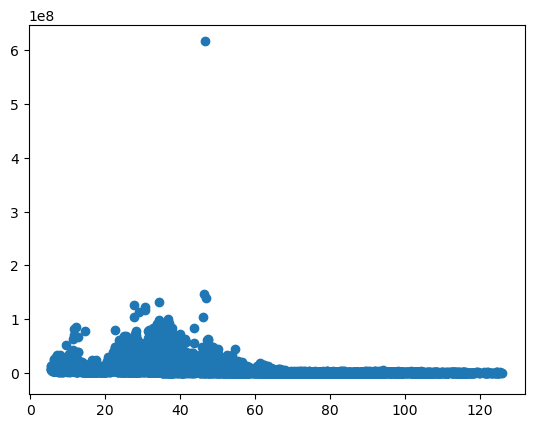

In [82]:
plt.scatter(CombinedData_df["avg_price_day"],CombinedData_df["Volume"])
# plt.xlabel()
# plt.ylabel()
plt.plot(CombinedData_df["avg_price_day"],pe_fit,"--")
plt.show()
